<a href="https://colab.research.google.com/github/jmmartinnu2/Trading/blob/main/analisis_diario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VAMOS A RECOPILAR DATOS DEL FUTURO ES, DIARIAMENTE

In [1]:
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=5670755c89f0ee304ece1563403ac69a85348e00adab71a7d372264209bfeff5
  Stored in directory: /root/.cache/pip/wheels/46/c3/e9/d1797db3a01a1f101ad3cbcdf01b1be7273a25c78c77dd4bb9
Successfully built regressors


In [2]:
#creamos nuestro dataframe importamos librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Añadir valores al array por el final
#data['vah'].append(3966.25)

In [5]:
#Devolver los valores del array o columna
#print(data.get("vah"))

In [ ]:
#Comprobar si existe un valor dentro del array
#print (4131.50 in data["val"])


In [8]:
df = pd.DataFrame(data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dia          80 non-null     object 
 1   vah          80 non-null     float64
 2   vpoc         80 non-null     float64
 3   val          80 non-null     float64
 4   vol          80 non-null     int64  
 5   range        80 non-null     int64  
 6   vwap         80 non-null     float64
 7   open         80 non-null     float64
 8   high         80 non-null     float64
 9   low          80 non-null     float64
 10  close        80 non-null     float64
 11  vol_vah      80 non-null     int64  
 12  vol_vpoc     80 non-null     int64  
 13  vol_val      80 non-null     int64  
 14  poc_naked    80 non-null     int64  
 15  rango_area   80 non-null     float64
 16  delta        80 non-null     int64  
 17  vix_close    80 non-null     float64
 18  dia_semanal  80 non-null     object 
dtypes: float64

In [10]:
# Guarda datos en CSV:
df.to_csv('datos-diarios.csv')

In [ ]:
ultimosdias = df.tail(5)

In [ ]:
#len(data['dia'])

In [ ]:
#df.iloc[:1-16]

In [ ]:
#df['vix_close']
#for i in df['vix_close']:
  #print (i) 

In [ ]:
#mostrar vix_close ordenados de menor a mayor vix
df.loc[:, [ 'vol']].max()

vol    3191800
dtype: int64

In [ ]:
#Comprobamos que nivel de volatilidad hay en el mercado
#import numpy as np
#funcion volatilidad
def volatilidad(numero):
    if numero > 15.01 and numero < 25.99:
      #print (i)
      return ('Volatilidad Baja')
    elif numero > 26.00 and numero < 34.99:
      return ('Volatilidad Media')
    elif numero > 35.00 and numero < 49.99:
      return ('Volatilidad Alta')
    elif numero > 50.00:
      return ('Volatilidad Extrema')

volatilidad(25.89)

'Volatilidad Baja'

In [ ]:
#mostrar vix_close ordenados de menor a mayor vix
#df.groupby(['vol']).max()

In [ ]:
#Comprobar la longitud de cada lista
#len(data['vol_vah'])

In [ ]:
#VAMOS A HACER UNA FUSION DE UN FICHERO CSV PARA INTEGRARLO CON EL DATAFRAME PRINCIOPAL
#df_squeeze = pd.read_csv('datos-diarios-squeeze.csv')

In [ ]:
#df_squeeze.head(5)

In [ ]:
#Añadimos las fechas correctas desde fecha inicio de mi dataset principal el 15 de agosto de 2022
df_date = df_squeeze['date']>= '2022-08-15'
df_date

0       False
1       False
2       False
3       False
4       False
        ...  
2893     True
2894     True
2895     True
2896     True
2897     True
Name: date, Length: 2898, dtype: bool

In [ ]:
#concatenamos este nuevo dataset con las fechas del squeeze desde el 15 de agosto 2022
df_squeeze2 = pd.concat([df_date, df_squeeze], axis=1)

In [ ]:
#Cuando volvamos a descargar un fichero volvemos a realizar el proceso
#eliminamos la columna date, Unnamed y price
df_squeeze2 = df_squeeze.drop(['date'], axis=1)
#df_squeeze = df_squeeze.drop(['Unnamed: 0'], axis=1)
df_squeeze2 = df_squeeze.drop(['price'], axis=1)

In [ ]:
#Comprobamos que se hayan eliminado
df_squeeze2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2898 non-null   object 
 1   dix     2898 non-null   float64
 2   gex     2898 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


In [ ]:
#Concatenamos nuestras 2 columnas del fichero squeeze y la añadimos a nuestro dataframe principal df
df = pd.concat([df, df_squeeze], axis=1)

In [6]:
df.head(2)

,dia,vah,vpoc,val,vol,range,vwap,open,high,low,close,vol_vah,vol_vpoc,vol_val,poc_naked,rango_area,delta,vix_close,dia_semanal
0,08/15/2022,4303.75,4298.00,4271.00,1275500,223,4281.74,4277.0,4304.75,4249.00,4298.25,400,78100,44500,0,32.75,2100,19.95,Lunes
1,08/16/2022,4314.50,4307.75,4290.75,1319200,195,4300.80,4277.0,4327.50,4278.75,4307.75,19200,63100,51300,0,23.75,-12800,19.69,Martes


In [ ]:
#comprobamos el tipo de dato de las 2 nuevas variables
df.dtypes

dia             object
vah            float64
vpoc           float64
val            float64
vol            float64
range          float64
vwap           float64
open           float64
high           float64
low            float64
close          float64
vol_vah        float64
vol_vpoc       float64
vol_val        float64
poc_naked      float64
rango_area     float64
delta          float64
vix_close      float64
dia_semanal     object
date            object
price          float64
dix            float64
gex            float64
dtype: object

In [ ]:
df.isnull().sum()

dia            2840
vah            2840
vpoc           2840
val            2840
vol            2840
range          2840
vwap           2840
open           2840
high           2840
low            2840
close          2840
vol_vah        2840
vol_vpoc       2840
vol_val        2840
poc_naked      2840
rango_area     2840
delta          2840
vix_close      2840
dia_semanal    2840
date              0
price             0
dix               0
gex               0
dtype: int64

In [ ]:
###reemplezamos los valores nulos de las columnas dix y gex por valores medios. Solo teniamos 2 filas con valores nulos
#df = df.fillna(df.median())
#df.tail(5)

In [ ]:
#estadisticas rapidas
df.describe()

,vah,vpoc,val,vol,range,vwap,open,high,low,close,vol_vah,vol_vpoc,vol_val,poc_naked,rango_area,delta,vix_close,price,dix,gex
count,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,2898.000000,2898.000000,2.898000e+03
mean,3904.935345,3885.155172,3864.189655,2.024081e+06,362.086207,3885.853448,3889.840517,3931.349138,3841.961207,3881.556034,29100.689655,81475.862069,28618.965517,0.172414,40.732759,-7022.241379,27.221552,2521.117719,0.425366,2.641409e+09
std,192.770973,195.348827,200.002200,6.068394e+05,164.741508,196.555893,203.499244,193.308912,205.603843,197.715073,18685.580130,27836.605399,17938.006861,0.381039,25.667102,137175.906496,3.710867,941.017450,0.031538,2.844668e+09
min,3613.250000,3598.250000,3557.000000,1.884000e+05,108.000000,3605.960000,3591.000000,3635.250000,3502.000000,3588.500000,400.000000,15900.000000,2000.000000,0.000000,10.750000,-880000.000000,19.560000,1099.229980,0.330555,-7.496823e+09
25%,3731.625000,3711.687500,3682.250000,1.799500e+06,245.250000,3705.210000,3713.562500,3773.500000,3661.562500,3714.750000,15050.000000,62500.000000,14350.000000,0.000000,23.750000,-12475.000000,25.492500,1853.652466,0.403981,1.136391e+09
50%,3889.000000,3869.125000,3853.250000,2.121450e+06,313.000000,3872.395000,3879.875000,3919.375000,3833.750000,3870.750000,30950.000000,76400.000000,26250.000000,0.000000,33.750000,-2145.000000,27.035000,2292.820000,0.423228,2.207626e+09
75%,4000.937500,3991.187500,3970.312500,2.359450e+06,453.000000,3994.825000,4004.500000,4052.812500,3950.437500,3985.625000,40875.000000,97650.000000,43975.000000,0.000000,50.500000,7925.000000,30.160000,2997.460000,0.443363,3.428719e+09
max,4314.500000,4307.750000,4290.750000,3.191800e+06,946.000000,4300.800000,4309.250000,4327.500000,4278.750000,4307.750000,80600.000000,153900.000000,84700.000000,1.000000,140.750000,535000.000000,33.630000,4796.560059,0.551115,2.421867e+10


In [ ]:
#df.info()

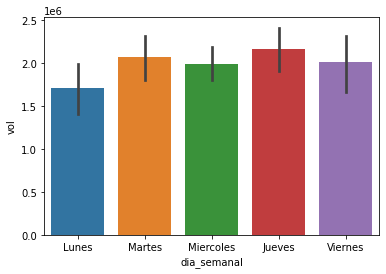

In [ ]:
sns.barplot(data =df, x='dia_semanal', y='vol')
plt.show()

REGRESION LINEAL
Con 2 variables numericas para predecir precio de cierre partiendo de variable vix_close

In [ ]:
#librerias para regresion linea
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#un primer modelo de regresion linea para predecir precio de cierre
x= df['vix_close'].values.reshape(-1,1)
y = df['close'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)


LinearRegression()

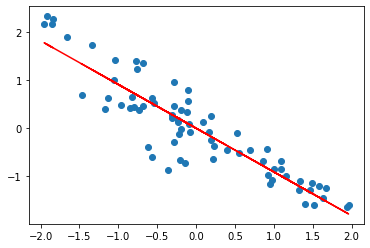

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std), color='r')

In [ ]:
#variable a predecir el precio de cierre
prec_vix =20.60
prec_vix_std = sc_x.transform(np.array([prec_vix]).reshape(-1,1))
print('el precio de cierre es', sc_y.inverse_transform(slr.predict(prec_vix_std)))

el precio de cierre es [[4160.26189489]]


In [ ]:
#OTRA REGRESION
#un primer modelo de regresion linea para predecir precio de cierre
x= df['vix_close'].values.reshape(-1,1)
y = df['vol'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

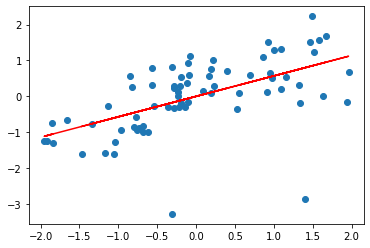

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std), color='r')

In [ ]:
#variable a predecir el precio maximo de cierre
vix_estimado =21.60
vix_estimado_std = sc_x.transform(np.array([vix_estimado]).reshape(-1,1))
print('el volumen será de: ', sc_y.inverse_transform(slr.predict(vix_estimado_std)))

el volumen será de:  [[1557646.61944285]]


In [ ]:
#OTRA REGRESION variable
#un primer modelo de regresion linea para predecir precio de cierre
x= df['vol'].values.reshape(-1,1)
y = df['close'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

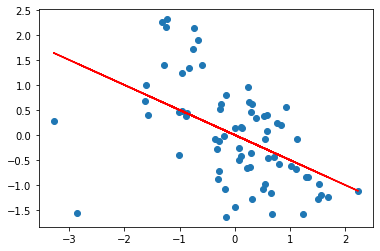

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std), color='r')

In [ ]:
#variable a predecir el precio maximo de cierre
vol_estimado =1557646
vol_estimado_std = sc_x.transform(np.array([vol_estimado]).reshape(-1,1))
print('el precio de cierre será de: ', sc_y.inverse_transform(slr.predict(vol_estimado_std)))

el precio de cierre será de:  [[3958.57091758]]


IMPLEMENTACION DE CORRECION DE MODELOS LINEAR LOSS (PARA REGRESIONES LINEALES, LASSO Y RIDGE. CON ESTE TIPO DE CORRECCIONES PODEMOS SABER QUE VARIABLES ESTAN APORTANDO MAS Y MEJOR INFORMACION

EL RESULTADO ES: VER QUE VALORES SON MAS ALTOS Y LOS QUE SON MAS ALTO SERAN LOS QUE MEJOR APORTACIÓN ESTAN HACIENDO AL MODELO

In [ ]:
# Importamos los modelos de sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Importamos las metricas de entrenamiento y el error medio cuadrado
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Vamos a elegir los features que vamos a usar
X = df[['vol', 'vwap', 'vpoc', 'vix_close' ]]
# Definimos nuestro objetivo, que sera nuestro data set, pero solo en la columna score 
y = df[['close']]

# Imprimimos los conjutos que creamos 
# En nuestros features tendremos definidos 155 registros, uno por cada pais, 7 colunas 1 por cada pais 
print(X.shape)
# Y 155 para nuestra columna para nuestro target 
print(y.shape)

# Aquí vamos a partir nuestro entrenaminto en training y test, no hay olvidar el orden
# Con el test size elejimos nuestro porcetaje de datos para training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Aquí definimos nuestros regresores uno por 1 y llamamos el fit o ajuste 
modelLinear = LinearRegression().fit(X_train, y_train)
# Vamos calcular la prediccion que nos bota con la funcion predict con la regresion lineal 
# y le vamos a mandar el test 
y_predict_linear = modelLinear.predict(X_test)

# Configuramos alpha, que es valor labda y entre mas valor tenga alpha en lasso mas penalizacion 
# vamos a tener y lo entrenamos con la función fit 
modelLasso = Lasso(alpha=0.2).fit(X_train, y_train)
# Hacemos una prediccion para ver si es mejor o peor de lo que teniamos en el modelo lineal sobre
# exactamente los mismos datos que teníamos anteriormente 
y_predict_lasso = modelLasso.predict(X_test)

# Hacemos la misma predicción, pero para nuestra regresion ridge 
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
# Calculamos el valor predicho para nuestra regresión ridge 
y_predict_ridge = modelRidge.predict(X_test)

# Calculamos la perdida para cada uno de los modelos que entrenamos, empezaremos con nuestro modelo 
# lineal, con el error medio cuadratico y lo vamos a aplicar con los datos de prueba con la prediccion 
# que hicimos 
linear_loss = mean_squared_error(y_test, y_predict_linear)
# Mostramos la perdida lineal con la variable que acabamos de calcular
print("Linear loss: ", linear_loss) 
  
# Mostramos nuestra perdida Lasso, con la variable lasso loss 
lasso_loss = mean_squared_error(y_test, y_predict_lasso)
print("Lasso Loss. ", lasso_loss) 

# Mostramos nuestra perdida de Ridge con la variable lasso loss 
ridge_loss = mean_squared_error(y_test, y_predict_ridge)
print("Ridge loss: ", ridge_loss)

# Imprimimos las coficientes para ver como afecta a cada una de las regresiones 
# La lines "="*32 lo unico que hara es repetirme si simbolo de igual 32 veces 
print("="*32)
print("Coeficientes lasso: ")
# Esta informacion la podemos encontrar en la variable coef_ 
print(modelLasso.coef_)

# Hacemos lo mismo con ridge 
print("="*32)
print("Coeficientes ridge:")
print(modelRidge.coef_) 

------FIN DE REGRESION LINEAL-----------

REGRESION LINEAL PARA PREDECIR PRECIO DE CIERRE CON VWAP

In [ ]:
#transformo la regresion lineal en una funcion con el unico parametro del dato que necesito estimar
def regresionLineal(valor):
  #librerias para regresion linea
  from sklearn.preprocessing import StandardScaler
  from sklearn.linear_model import LinearRegression

  #un primer modelo de regresion linea para predecir precio de cierre
  x= df['close'].values.reshape(-1,1)
  y = df['vwap'].values.reshape(-1,1)

  sc_x = StandardScaler()
  sc_y = StandardScaler()

  x_std = sc_x.fit_transform(x)
  y_std = sc_y.fit_transform(y)

  slr = LinearRegression()
  slr.fit(x_std, y_std)
  plt.scatter(x_std,y_std)
  plt.plot(x_std,slr.predict(x_std), color='b')

  vwap_stat = valor
  vwap_stat_std = sc_x.transform(np.array([vwap_stat]).reshape(-1,1))
  return ('el precio de cierre se situara en los niveles de: ', sc_y.inverse_transform(slr.predict(vwap_stat_std)))

('el precio de cierre se situara en los niveles de: ',
 array([[3966.63123529]]))

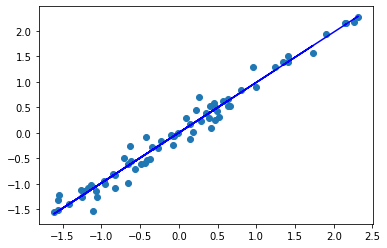

In [ ]:
regresionLineal(3965.50)

In [ ]:
#librerias para regresion linea
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#un primer modelo de regresion linea para predecir precio de cierre
x= df['close'].values.reshape(-1,1)
y = df['vwap'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

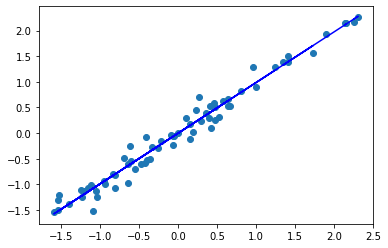

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std), color='b')

In [ ]:
vwap_stat = 3939.47
vwap_stat_std = sc_x.transform(np.array([vwap_stat]).reshape(-1,1))
print('el precio de cierre se situara en los niveles de: ', sc_y.inverse_transform(slr.predict(vwap_stat_std)))

el precio de cierre se situara en los niveles de:  [[3941.29614896]]


REGRESION LINEAL PARA PREDECIR PRECIO DE CIERRE CON VPOC

In [ ]:
#librerias para regresion linea
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#un primer modelo de regresion linea para predecir precio de cierre
x= df['close'].values.reshape(-1,1)
y = df['vpoc'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

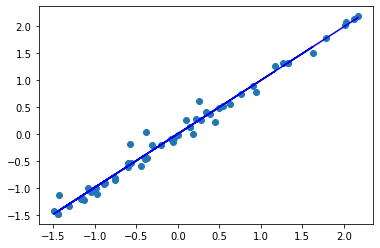

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std), color='b')

In [ ]:
vpoc_stat = 3770.25
vpoc_stat_std = sc_x.transform(np.array([vpoc_stat]).reshape(-1,1))
print('el precio de cierre se situara en los niveles de: ', sc_y.inverse_transform(slr.predict(vpoc_stat_std)))

el precio de cierre se situara en los niveles de:  [[3775.96544798]]


In [ ]:
#volumen por dias, graficos con añadido de categorias 
plt.figure(figsize=(8,6)) #para tamaños del grafico
sns.boxplot(data=df, x='dia_semanal',y='vwap', hue='dia_semanal', dodge=True) #dodge agrupa las variables
plt.show()

#concluimos con este grafico que tenemos mas volumne los martes y viernes

NameError: ignored

<Figure size 576x432 with 0 Axes>

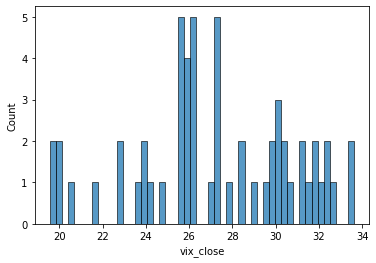

In [ ]:
sns.histplot(df['vix_close'], bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


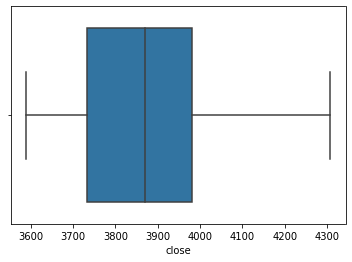

In [ ]:
sns.boxplot(df['close'])

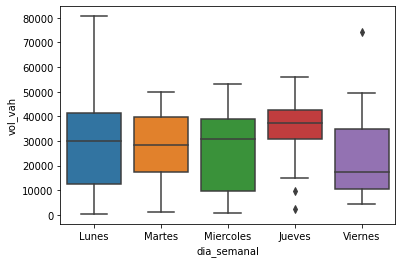

In [ ]:
sns.boxplot(data = df, x='dia_semanal', y='vol_vah')

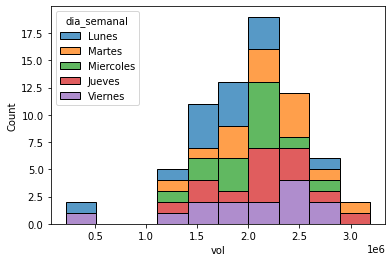

In [ ]:
#DIAGRANA DE DISPERSION PARA TRABAJAR LAS CORRELACIONES
sns.histplot(data =df,
                x='vol', 
                hue = 'dia_semanal',multiple='stack')

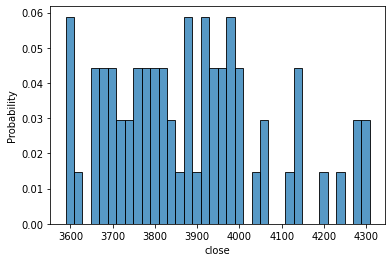

In [ ]:
#distribuciones con probabilidad en el eje y
sns.histplot(data=df, x='close',binwidth= 20, stat='probability')

In [ ]:
#Instalamos libreria para probabilidades
!pip install empiricaldist


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#calculando probabilidades
from empiricaldist import Pmf

dato_probabilidad = Pmf.from_seq(df.close, normalize = False) #El parametro nomralize nos devuelve el porcentaje si lo ponemos en true y la frecuencia si lo ponemos en false

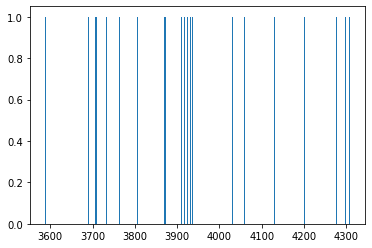

In [ ]:
dato_probabilidad.bar()

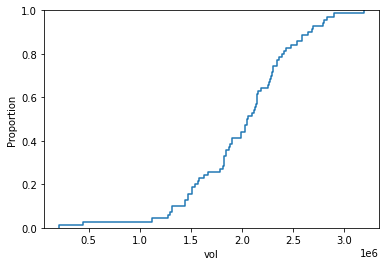

In [ ]:
#Preguntamos cual es la probabilidad de encontrar precios en %
sns.ecdfplot(data = df, x='vol')

In [ ]:
import empiricaldist
#UTILIZANDO EMPIRICALDIST
dt_pro = empiricaldist.Cdf.from_seq(df.close, normalize=True)
dt_pro

ModuleNotFoundError: ignored

3819.5 0.46296296296296297


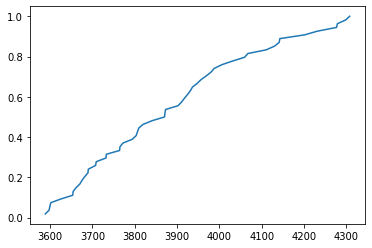

In [ ]:
dt_pro.plot()
q = 3819.50
p = dt_pro.forward(q)
print(q,p)

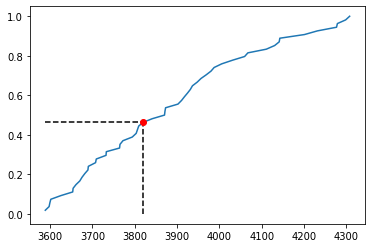

In [ ]:
#ahora ajustamos lo anterior pero que nos diga donde justamente se puede encontrar el valor con la probabilidad
dt_pro.plot()

q = 3819.50
p = dt_pro.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)





plt.hlines(
    y = p,
    xmin = dt_pro.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
plt.plot(q,p,'ro')

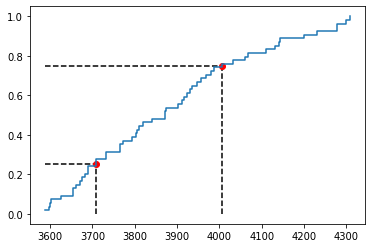

In [ ]:
#Igual que el anterior pero le suma los cuartiles para añadir mas probabilidades estadisticas fiables

dt_pro.step()

p_1 = 0.25 #Especificamos la probabilidad
p_2 = 0.75

ps = (0.25, 0.75)
qs = dt_pro.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)





plt.hlines(
    y = ps,
    xmin = dt_pro.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)
plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

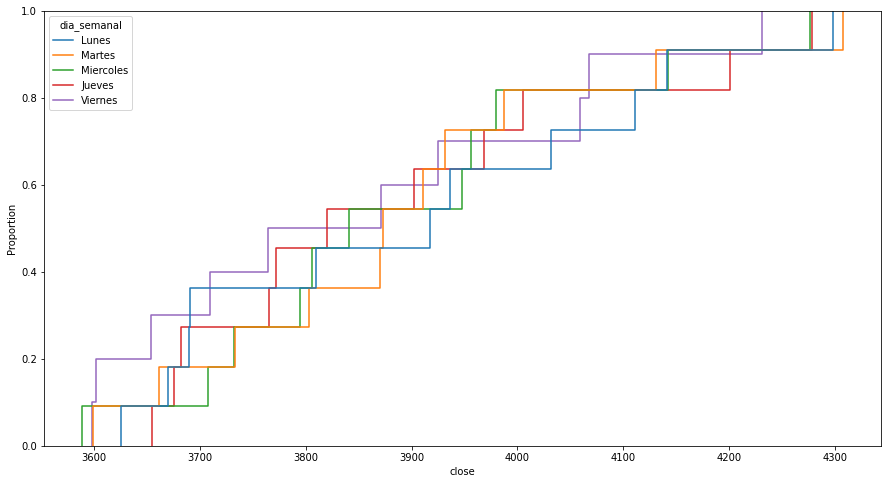

In [ ]:
#Disribucion de precios de cierres por dias de la semana
plt.figure(figsize=(15,8)) #para tamaños del grafico
sns.ecdfplot(
    data =df,
    x='close',
    hue = 'dia_semanal'
)

In [ ]:
#MEDIDAS DE DISPERSION
#Calculamos los maximos y minimos pero solo de variables numericas que es lo que tiene sentido

#df.max(numeric_only=True)
df.max(numeric_only=True)

vah              4314.50
vpoc             4307.75
val              4290.75
vol           3191800.00
range             946.00
vwap             4300.80
open             4309.25
high             4327.50
low              4278.75
close            4307.75
vol_vah         74400.00
vol_vpoc       153900.00
vol_val         62800.00
poc_naked           1.00
rango_area        140.75
delta          535000.00
vix_close          33.63
dtype: float64

In [ ]:
#QUEREMOS CALCULAR EL RANGO 
df.max(numeric_only=True)-df.min(numeric_only=True)

vah               701.25
vpoc              709.50
val               733.75
vol           3003400.00
range             838.00
vwap              694.84
open              718.25
high              692.25
low               776.75
close             719.25
vol_vah         74000.00
vol_vpoc       138000.00
vol_val         60800.00
poc_naked           1.00
rango_area        130.00
delta         1415000.00
vix_close          14.07
dtype: float64

In [ ]:
#CUAL ES LA DESVIACION STANDARD
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


vah              199.861176
vpoc             202.474545
val              207.333343
vol           628191.366331
range            162.005823
vwap             203.707678
open             210.599918
high             200.424424
low              212.653920
close            204.393959
vol_vah        17388.320699
vol_vpoc       27504.645691
vol_val        16607.343059
poc_naked          0.392095
rango_area        25.497721
delta         142193.738415
vix_close          3.827732
dtype: float64

In [ ]:
#Cauartil 75%
df.quantile(0.75)

vah           4.035250e+03
vpoc          4.000812e+03
val           3.976750e+03
vol           2.387150e+06
range         4.517500e+02
vwap          4.010395e+03
open          4.020562e+03
high          4.070562e+03
low           3.961625e+03
close         4.001000e+03
vol_vah       4.087500e+04
vol_vpoc      9.622500e+04
vol_val       4.397500e+04
poc_naked     0.000000e+00
rango_area    4.600000e+01
delta         8.750000e+03
vix_close     3.042000e+01
Name: 0.75, dtype: float64

In [ ]:
#Cuartil 25%
df.quantile(0.25)

vah           3.717625e+03
vpoc          3.707375e+03
val           3.678062e+03
vol           1.697175e+06
range         2.452500e+02
vwap          3.702783e+03
open          3.706688e+03
high          3.771188e+03
low           3.658125e+03
close         3.707688e+03
vol_vah       1.532500e+04
vol_vpoc      6.200000e+04
vol_val       1.435000e+04
poc_naked     0.000000e+00
rango_area    2.375000e+01
delta        -1.247500e+04
vix_close     2.547000e+01
Name: 0.25, dtype: float64

In [ ]:
#Rango intercuartilico es la resta entre el cuartil 75% - 25% = RANGO INTERCUARTILICO
df.quantile(0.75)-df.quantile(0.25)

vah              317.6250
vpoc             293.4375
val              298.6875
vol           689975.0000
range            206.5000
vwap             307.6125
open             313.8750
high             299.3750
low              303.5000
close            293.3125
vol_vah        25550.0000
vol_vpoc       34225.0000
vol_val        29625.0000
poc_naked          0.0000
rango_area        22.2500
delta          21225.0000
vix_close          4.9500
dtype: float64

In [ ]:
df.quantile(q=[0.75,0.50,.025]).T.rename_axis('variable').reset_index().assign(iqr=lambda df:df[0.75]- [0.25])

,variable,0.75,0.5,0.025,iqr
0,vah,4.035250e+03,3884.375,3627.20000,4.035000e+03
1,vpoc,4.000812e+03,3869.125,3602.41250,4.000562e+03
2,val,3.976750e+03,3855.000,3585.00625,3.976500e+03
3,vol,2.387150e+06,2135850.000,288180.00000,2.387150e+06
4,range,4.517500e+02,313.000,158.12500,4.515000e+02
5,vwap,4.010395e+03,3872.395,3608.38000,4.010145e+03
6,open,4.020562e+03,3882.125,3594.22500,4.020312e+03
7,high,4.070562e+03,3915.125,3657.88125,4.070312e+03
8,low,3.961625e+03,3833.750,3574.10625,3.961375e+03
9,close,4.001000e+03,3870.750,3598.06875,4.000750e+03


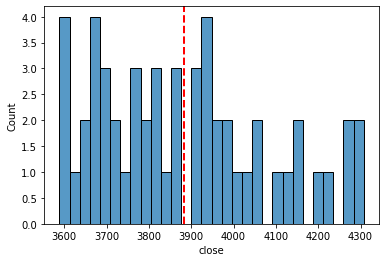

In [ ]:
#HISTROGRMA CON UNA DIVISION DE LAS MEDIDAS DE DISPERSION 
sns.histplot(data = df,
             x= 'close',
             bins = 30)
plt.axvline(
    x = df.close.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth=2
)

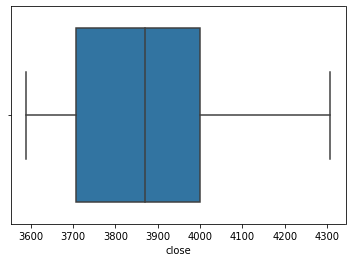

In [ ]:
#DIAGRAMA DE CAJA y vemos en la caja azul el 50 de nuestro datos con la linea negra que nos indica la media, nuestros datos esta un poco sesgado hacia la izquierda
sns.boxplot(
    data =df,
    x = 'close'
)

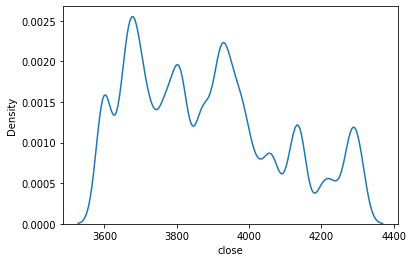

In [ ]:
#FUNCIONES DE DENSIDAD DE PROBABILIDAD, ES LA PROBABILIDAD DE QUE UN PRECIO DE CIERRE TENGA UNA LONGITUD DETERMINADA
sns.kdeplot(
    data = df,
    x = 'close',
    bw_method = 0.1
)


MATRICES DECORRELACIONES - ESTABLECER RELACIONES

In [ ]:
df.corr()

,vah,vpoc,val,vol,range,vwap,open,high,low,close,vol_vah,vol_vpoc,vol_val,poc_naked,rango_area,delta,vix_close
vah,1.000000,0.995834,0.992885,-0.415957,-0.282885,0.996203,0.977289,0.992675,0.985405,0.989305,0.100212,-0.017815,0.185701,0.078412,-0.239564,-0.218904,-0.963507
vpoc,0.995834,1.000000,0.995563,-0.439083,-0.336642,0.994275,0.969880,0.984270,0.986901,0.994276,0.118584,0.010767,0.224775,0.070772,-0.294124,-0.222620,-0.969733
val,0.992885,0.995563,1.000000,-0.464985,-0.376129,0.997663,0.975478,0.984321,0.994901,0.990603,0.156105,0.033284,0.221634,0.066956,-0.353466,-0.220600,-0.967085
vol,-0.415957,-0.439083,-0.464985,1.000000,0.490500,-0.436601,-0.369340,-0.382983,-0.447406,-0.432574,0.092656,0.204444,0.061367,0.056445,0.523140,0.146322,0.440630
range,-0.282885,-0.336642,-0.376129,0.490500,1.000000,-0.341463,-0.284180,-0.235526,-0.411384,-0.356257,-0.523349,-0.080428,-0.400501,0.195429,0.844593,0.108722,0.381478
vwap,0.996203,0.994275,0.997663,-0.436601,-0.341463,1.000000,0.983996,0.991513,0.995489,0.989251,0.149066,0.007179,0.190811,0.061920,-0.308320,-0.218836,-0.964442
open,0.977289,0.969880,0.975478,-0.369340,-0.284180,0.983996,1.000000,0.990929,0.983916,0.960800,0.168164,0.018154,0.156741,0.075833,-0.275958,-0.221135,-0.933176
high,0.992675,0.984270,0.984321,-0.382983,-0.235526,0.991513,0.990929,1.000000,0.981927,0.975426,0.101861,0.002580,0.156677,0.089490,-0.227226,-0.214327,-0.948108
low,0.985405,0.986901,0.994901,-0.447406,-0.411384,0.995489,0.983916,0.981927,1.000000,0.982766,0.200948,0.019355,0.216515,0.046438,-0.370634,-0.221531,-0.960329
close,0.989305,0.994276,0.990603,-0.432574,-0.356257,0.989251,0.960800,0.975426,0.982766,1.000000,0.128165,0.012402,0.223402,0.045049,-0.304934,-0.206630,-0.976200


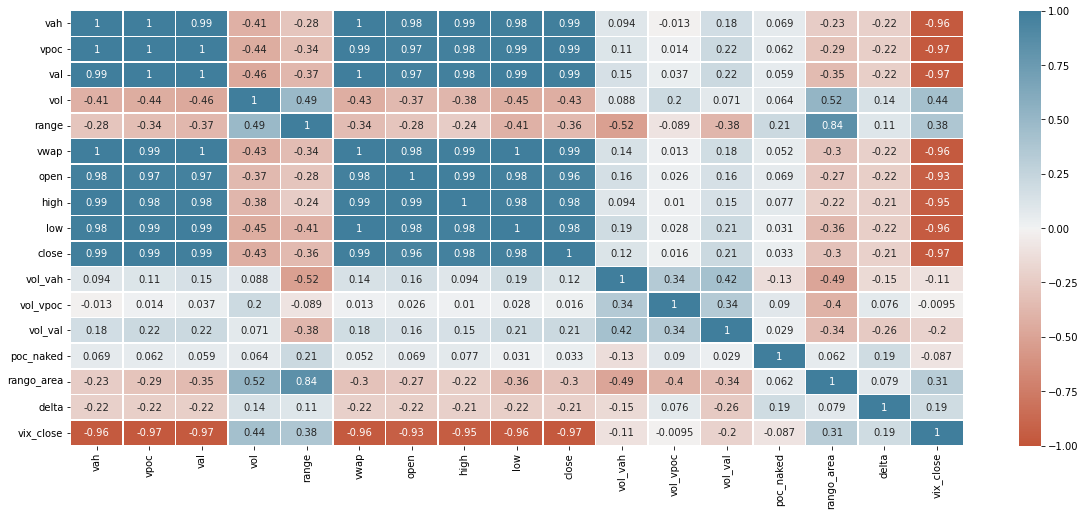

In [ ]:
plt.figure(figsize=(20,8)) #para tamaños del grafico
sns.heatmap(
    data = df.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

In [ ]:
#Transformamos la variable categorica dia_semanal en variable cuantitativa
df = df.assign(numeric_dia = lambda df:df.dia_semanal.replace(['Lunes','Martes','Miercoles','Jueves','Viernes'],[0,1,2,3,4]))

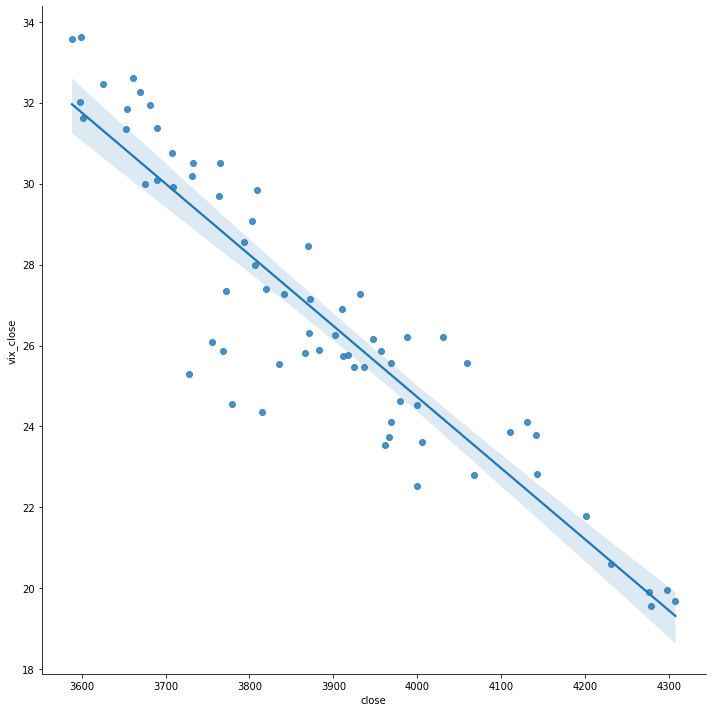

In [ ]:
#DETERMINAL EL IMPACTO DE LA CORRELACION - RELACIONES Y ANALISIS DE REGRESION SIMPLE
sns.lmplot(
    data = df,
    x = 'close',
    y = 'vix_close',
    height = 10
)

MODELO REGRESION MULTIPLE

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#CREAMOS 5 DISTINTOS MODELOS PARA PROBAR NUESTRO MODELO
model_1 = (
    smf.ols(
        formula = 'close ~ + vol + open +  delta',
        data = df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.16e-28
Time:                        08:36:22   Log-Likelihood:                -292.09
No. Observations:                  54   AIC:                             592.2
Df Residuals:                      50   BIC:                             600.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    441.0306    167.105      2.639      0.011     105.389     776.672
vol        -3.079e-05   1.32e-05     -2.327      0.024   -5.74e-05   -4.22e-06
open           0.9006      0.040     22.496      0.000       0.820       0.981
delta       1.857e-05   5.58e-05      0.333      0.741   -9.35e-05       0.000
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.749
Skew:                          -0.287   Prob(JB):                        0.687
Kurtosis:                       2.932   Cond. No.                     4.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_3 = (
    smf.ols(
        formula = 'close ~ vol + vix_close',
        data = df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     480.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           8.17e-34
Time:                        08:36:25   Log-Likelihood:                -282.73
No. Observations:                  54   AIC:                             571.5
Df Residuals:                      51   BIC:                             577.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5305.3388     46.315    114.549      0.000    5212.358    5398.320
vol        -2.239e-06   1.14e-05     -0.197      0.845   -2.51e-05    2.06e-05
vix_close    -51.8734      1.867    -27.789      0.000     -55.621     -48.126
==============================================================================
Omnibus:                        1.713   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.204
Skew:                          -0.069   Prob(JB):                        0.548
Kurtosis:                       2.282   Cond. No.                     1.55e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_4 = (
    smf.ols(
        formula = 'close ~ rango_area + vix_close',
        data = df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     480.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           8.20e-34
Time:                        08:36:27   Log-Likelihood:                -282.74
No. Observations:                  54   AIC:                             571.5
Df Residuals:                      51   BIC:                             577.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5305.9699     46.523    114.051      0.000    5212.572    5399.368
rango_area     0.0469      0.265      0.177      0.860      -0.486       0.580
vix_close    -52.1320      1.768    -29.490      0.000     -55.681     -48.583
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.226
Skew:                          -0.075   Prob(JB):                        0.542
Kurtosis:                       2.277   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Otra forma de combinar las variables

model_5 = (
    smf.ols(
        formula = 'close ~ vix_close + range + vol_vpoc + vol_vah + vol_val + delta + rango_area + vwap',
        data = df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     401.8
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.33e-39
Time:                        08:39:01   Log-Likelihood:                -247.77
No. Observations:                  54   AIC:                             513.5
Df Residuals:                      45   BIC:                             531.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1332.4377    371.021      3.591      0.001     585.163    2079.712
vix_close    -13.3172      3.793     -3.511      0.001     -20.956      -5.679
range         -0.0772      0.056     -1.382      0.174      -0.190       0.035
vol_vpoc       0.0002      0.000      0.901      0.372      -0.000       0.001
vol_vah       -0.0004      0.000     -1.375      0.176      -0.001       0.000
vol_val        0.0003      0.000      1.307      0.198      -0.000       0.001
delta        1.11e-05   2.73e-05      0.407      0.686   -4.38e-05     6.6e-05
rango_area     0.4703      0.341      1.381      0.174      -0.216       1.156
vwap           0.7489      0.070     10.695      0.000       0.608       0.890
==============================================================================
Omnibus:                        0.582   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.530
Skew:                          -0.229   Prob(JB):                        0.767
Kurtosis:                       2.838   Cond. No.                     1.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VISUALIZAMOS EL MODELO

In [ ]:
models_results =  pd.DataFrame(
    dict(
    actual_value = df['close'],
    prediction_model_1 = model_1.predict(),
    prediction_model_3 = model_3.predict(),
    prediction_model_4 = model_4.predict(),
    prediction_model_5 = model_5.predict(),
    )
)
models_results

,actual_value,prediction_model_1,prediction_model_3,prediction_model_4,prediction_model_5
0,4298.25,4253.679594,4267.609398,4267.472770,4300.290569
1,4307.75,4252.057342,4280.998651,4280.604848,4308.449178
2,4276.75,4273.017554,4269.516928,4269.422545,4283.068019
3,4278.75,4245.059812,4287.749579,4287.053597,4276.034130
4,4231.50,4251.597658,4233.107953,4232.789389,4239.427366
5,4141.25,4191.059997,4067.022228,4066.717607,4115.683196
6,4130.50,4128.449763,4051.230485,4049.806027,4119.895171
7,4142.75,4118.964798,4118.694050,4117.290902,4132.959269
8,4201.00,4129.244716,4172.016676,4171.648943,4170.999818
9,4059.50,4156.807927,3974.719251,3977.451817,4072.974945


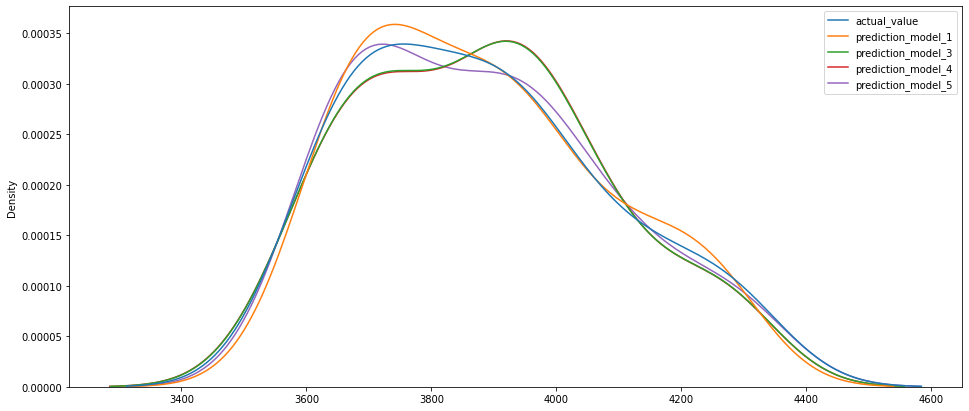

In [ ]:
#VISUALIZAMOS UN RESULTADO DE TODOS NUESTROS MODELOS
plt.figure(figsize=(16,7)) #para tamaños del grafico
sns.kdeplot(
    data = models_results
)

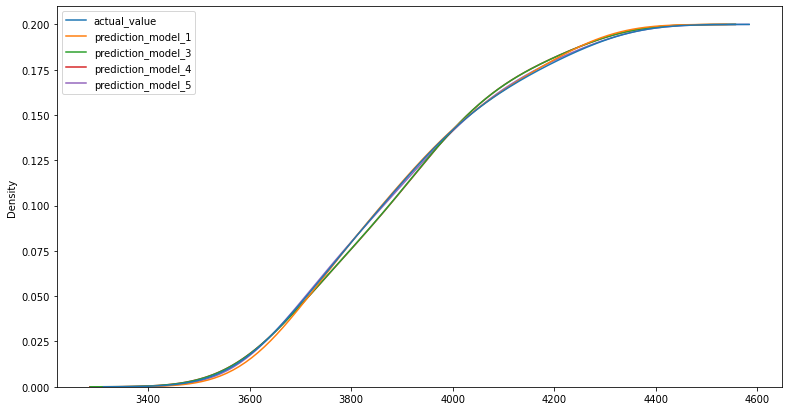

In [ ]:
#OTRA FORMA DE VISUALIZAR LOS DATOS , CUANTO MAS CERCA ESTE DEL ACTUAL VALUE PUES MEJOR SERA EL MODELO
plt.figure(figsize=(13,7)) #para tamaños del grafico
sns.kdeplot(
    data = models_results,
    cumulative = True
)

<Figure size 936x504 with 0 Axes>

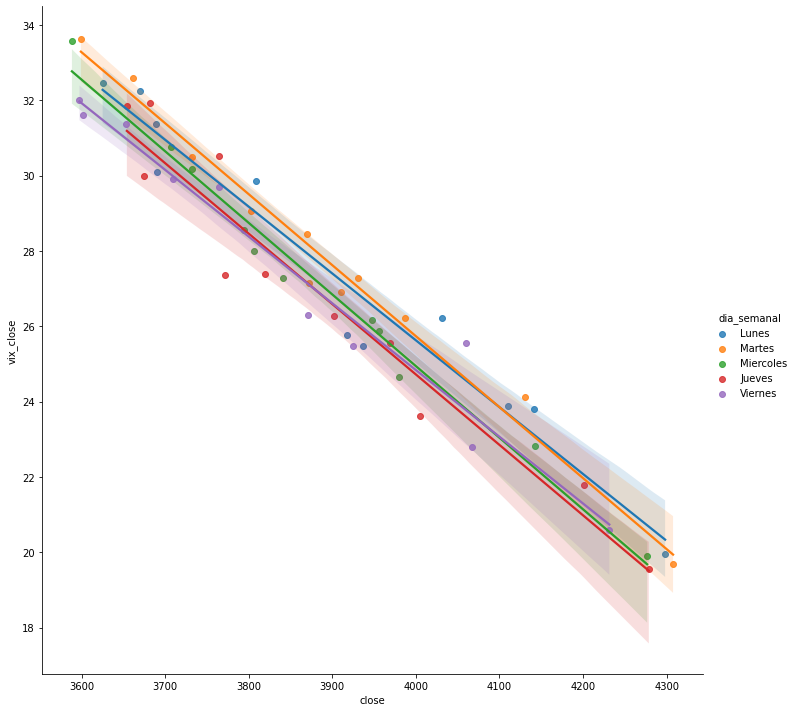

In [ ]:
#VISUALIZAMOS UN RESULTADO DE TODOS NUESTROS MODELOS
plt.figure(figsize=(13,7)) #para tamaños del grafico
sns.lmplot(
    data = df,
    x='close',
    y = 'vix_close',
    hue='dia_semanal',
    height=10
)

#CONCLUSIONES INTERESANTES , LOS JUEVES SUBEN MAS LOS PRECIOS Y HAY MAS VOLUMEN

PARADOJA DE SIMPSON

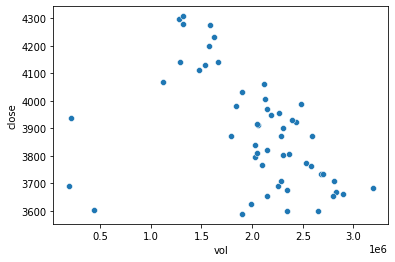

In [ ]:
#RESUMIMOS EL ANALISIS EXPLORATORIO DE DATOS CON ESTOS 2 PASOS SIGUIENTES
sns.scatterplot(
    data =df,
    x = 'vol',
    y = 'close'
)

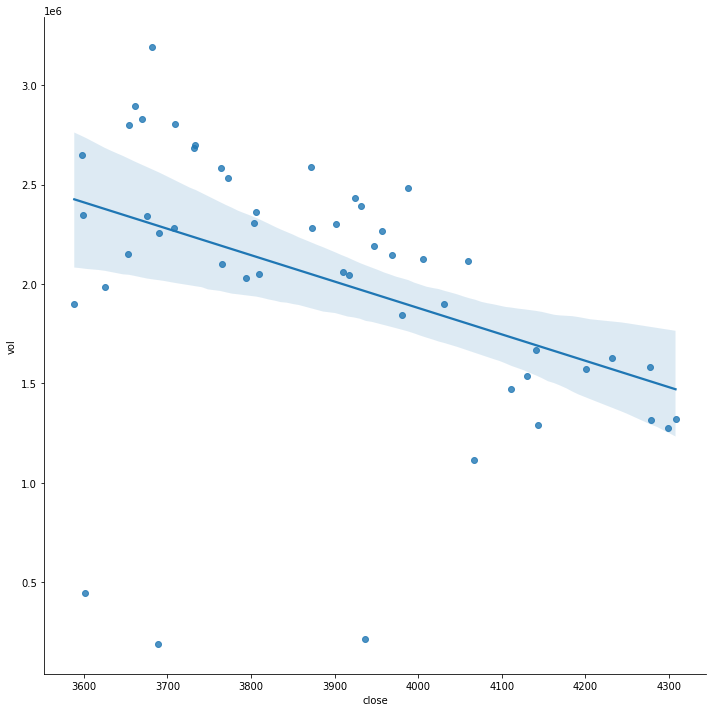

In [ ]:
#resumen 1 - REGRESION LINEAL SIMPLE
sns.lmplot(
    data =df,
    x = 'close',
    y = 'vol',
    height = 10
)

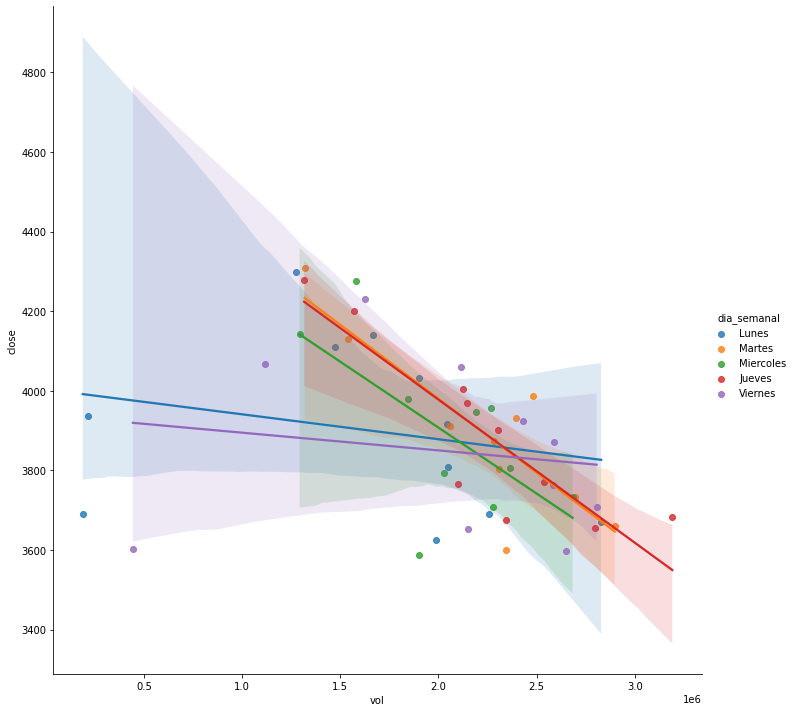

In [ ]:
#resumen 2 - REGRESION LINEAL SIMPLE con variable categorica 
sns.lmplot(
    data =df,
    x = 'vol',
    y = 'close',
    hue = 'dia_semanal',
    height = 10
)

In [ ]:
df.dtypes.value_counts()

float64    10
int64       8
object      2
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [ ]:
df= df.drop(['dia'], axis=1)

CREAMOS EL MODELO

In [ ]:
X_cols = ['vix_close','vol']
y_col = ['close']

X = df[X_cols].values
y = df[y_col].values

#creo el modelo con datos de entreno y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y)
#hacemos standarizacion de los datos
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(13, 1)

METRICAS

In [ ]:
#importo las metricas
import sklearn.metrics as metrics

#PRIMERAS METRICAS BASICAS PARA VER QUE TAL ES EL MODELO
#R2 ES IMPORTANTE SI ESTA POR ENCIMA DE 0.5 ES BUENO

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2', r2.round(4))
print('mse: ', mse.round(4))

r2 0.9552
mse:  0.0428


In [ ]:

model.intercept = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

----------------A PARTIR DE AQUI LO ANTIGUO ----------------

In [ ]:
from pandas.core.arrays import boolean
df.select_dtypes(include=['float64', 'int','boolean']).describe(include = 'all')

,vah,vpoc,val,vol,range,vwap,open,high,low,close,vol_vah,vol_vpoc,vol_val,poc_naked,rango_area,delta,vix_close,numeric_dia
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,3907.696078,3888.004902,3866.867647,2.031357e+06,358.176471,3889.653922,3895.401961,3935.333333,3847.137255,3885.696078,28764.705882,80703.921569,28060.784314,0.176471,40.813725,-6376.274510,27.302353,1.960784
std,205.524897,208.239853,213.307591,6.456693e+05,165.972613,209.457235,216.209575,205.920802,218.424325,210.135791,17774.102774,27917.542591,16734.014204,0.385013,26.172067,146345.907315,3.937539,1.441677
min,3613.250000,3598.250000,3557.000000,1.884000e+05,108.000000,3605.960000,3591.000000,3635.250000,3502.000000,3588.500000,400.000000,15900.000000,2000.000000,0.000000,10.750000,-880000.000000,19.560000,0.000000
25%,3714.500000,3698.125000,3673.125000,1.645900e+06,239.500000,3696.500000,3705.750000,3760.875000,3649.500000,3698.750000,15100.000000,62700.000000,14500.000000,0.000000,23.750000,-12450.000000,25.055000,1.000000
50%,3901.750000,3886.250000,3860.250000,2.147200e+06,306.000000,3875.430000,3889.500000,3927.000000,3846.250000,3872.750000,30900.000000,75200.000000,26300.000000,0.000000,33.750000,1600.000000,27.160000,2.000000
75%,4055.500000,4016.125000,3998.625000,2.414100e+06,450.500000,4025.785000,4029.875000,4075.000000,3985.125000,4018.375000,41800.000000,97200.000000,43450.000000,0.000000,49.250000,8500.000000,30.510000,3.000000
max,4314.500000,4307.750000,4290.750000,3.191800e+06,946.000000,4300.800000,4309.250000,4327.500000,4278.750000,4307.750000,74400.000000,153900.000000,62800.000000,1.000000,140.750000,535000.000000,33.630000,4.000000


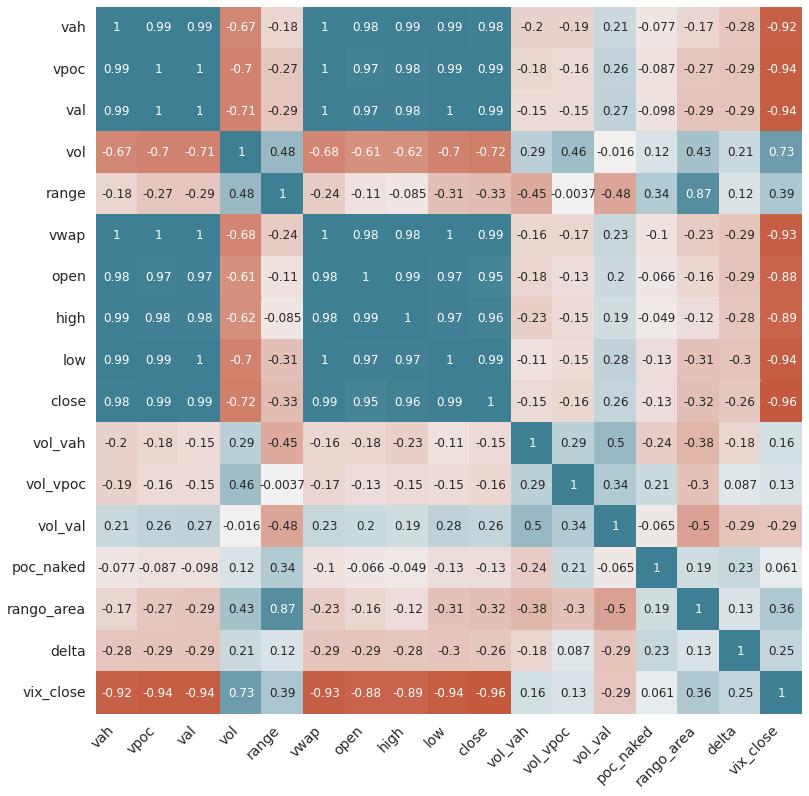

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 14)

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
df.select_dtypes(include=['object']).describe()

,dia,dia_semanal
count,54,54
unique,54,5
top,08/15/2022,Lunes
freq,1,11


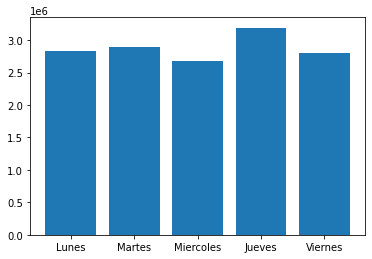

In [ ]:
#Grafico de barras
plt.bar(df['dia_semanal'],df['vol'])
plt.show()

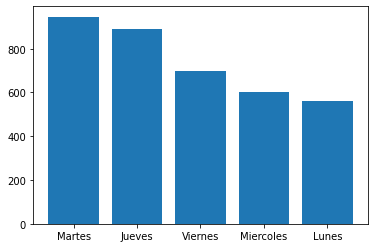

In [ ]:
#Grafico de barras ordenado
df = df.sort_values('range', ascending=False)
plt.bar(df['dia_semanal'],df['range'])
plt.show()

In [ ]:
from pandas.core.groupby import groupby
df.loc[:,['dia','vol']]

,dia,vol
21,09/13/2022,2394900
63,11/10/2022,2296700
43,10/13/2022,3191800
9,08/26/2022,2115500
57,11/02/2022,2137800
...,...,...
7,08/24/2022,1292800
6,08/23/2022,1537100
55,10/31/2022,1877500
3,08/18/2022,1315900


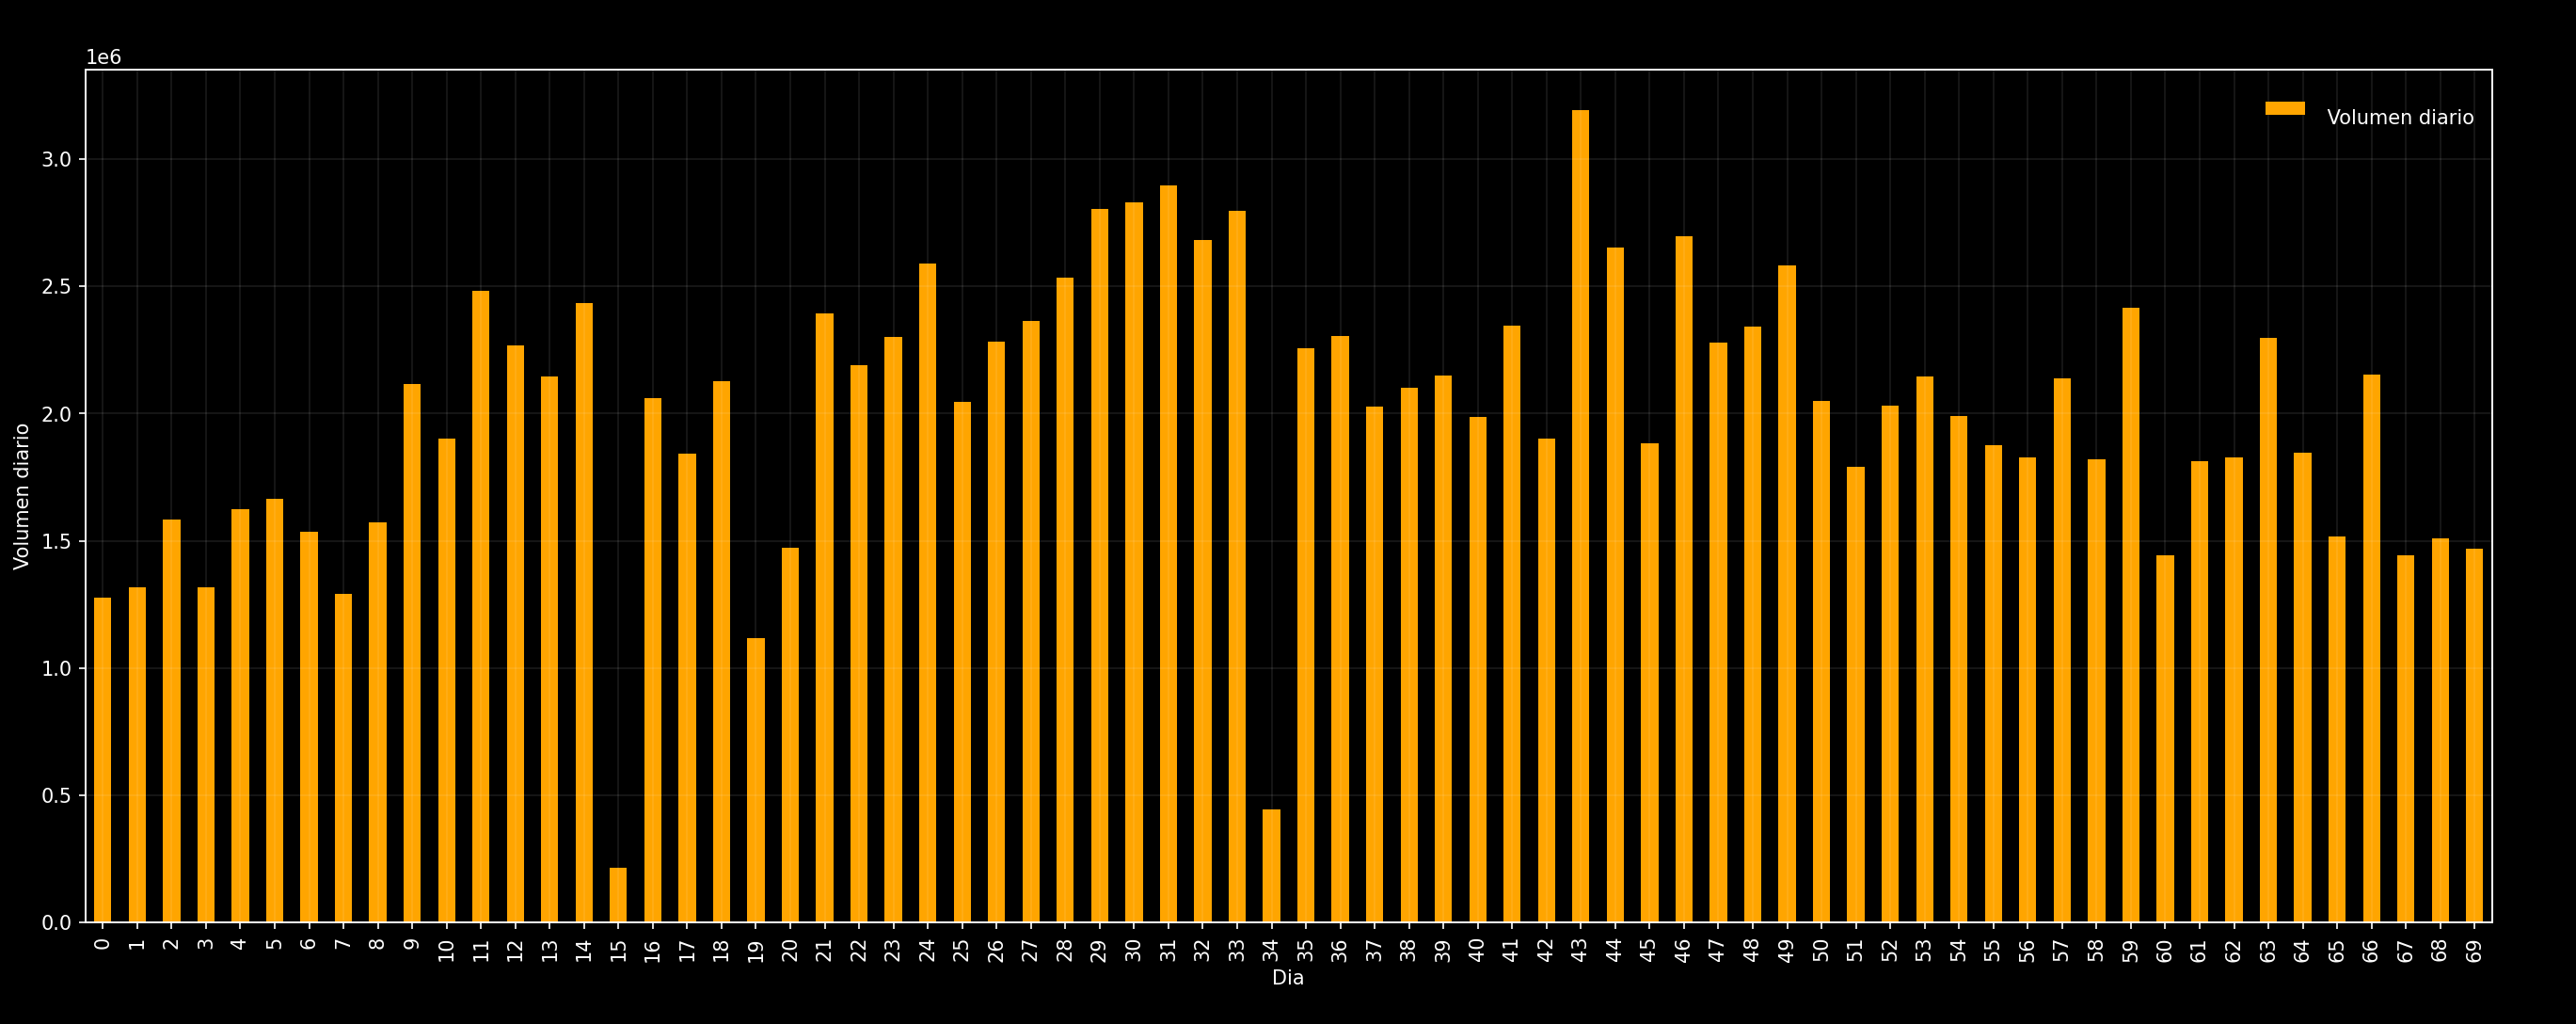

In [ ]:
plt.style.use("dark_background")
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(22,8))
df.loc[:,['vol']].plot(kind='bar', ax=ax, color=['orange'])
ax.grid(alpha=0.1)
lgds = ['\n Volumen diario',
 
      
       ]
ax.legend(lgds, frameon=False)
ax.set_title('\n ')
ax.set_ylabel('Volumen diario')
ax.set_xlabel('Dia\n')
ax2 = ax.twinx()
ax2.set_ylabel('\n \n')
ax2.set_yticks([])


plt.show()